## Daftar Isi

• Perkenalan <br>
• Transformasi data (data wrangling) dan pembersihan data (data cleaning) <br>
• Analisa Data (descriptive analysis & diagnostic analysis) dan visualisasi data (data visualization) <br>
• Kesimpulan

# Perkenalan

PT.ABC adalah perusahaan yang bergerak dalam penjualan berbagai macam produk elektronik dan digital seperti mainan, video games, tv, kamera, hp, film, dan lain-lain. PT.ABC menjual produknya melalui offline store yang tersebar diberbagai negara dan juga secara online. Sebagai data analis, kita ditugaskan oleh direktur perusahaan untuk menemukan insight/gagasan yang berguna untuk menaikan penjualan. <br>
Untuk projek kali ini kita akan menggunakan library numpy, pandas dan matplotlib. <Br>
Datasets terbagi menjadi 4 file yaitu sales, customers, products dan stores.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#membuat variabel untuk menampung data tabular dalam bentuk dataframe pandas
sales = pd.read_csv("sales.csv", delimiter=";", encoding='latin1',decimal= ",",thousands=".").convert_dtypes()
customers = pd.read_csv("customers.csv", delimiter=";", encoding='latin1').convert_dtypes()
products = pd.read_csv("products.csv", delimiter=";", encoding='latin1',decimal= ",",thousands=".").convert_dtypes()
stores = pd.read_csv("stores.csv", delimiter=";", encoding='latin1',decimal= ",",thousands=".").convert_dtypes()

# Data Wrangling & Data Cleaning

Apa saja yang akan dilakukan pada tahap ini? <br>
1. Mengubah data type kolom yang tidak sesuai. <br>
2. Menghapus baris duplikat yang tidak diperlukan. <br>
3. Menghapus kolom yang tidak diperlukan. <br>
4. Menambah 'calculated' kolom untuk memudahkan perhitungan dan analisa. <br>
5. Mencari NA value (nilai yang tidak sesuai dengan kolom ataupun nilai kosong). <br>

In [3]:
sales.info() #kolom OrderDate,%Discount,DeliveryDate masih dalam bentuk string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13915 entries, 0 to 13914
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderNumber   13915 non-null  Int64  
 1   OrderDate     13915 non-null  string 
 2   DeliveryDate  13915 non-null  string 
 3   CustomerKey   13915 non-null  Int64  
 4   StoreKey      13915 non-null  Int64  
 5   ProductKey    13915 non-null  Int64  
 6   Quantity      13915 non-null  Int64  
 7   UnitPrice     13915 non-null  Float64
 8   NetPrice      13915 non-null  Float64
 9   UnitCost      13915 non-null  Float64
 10  DaysDuration  13915 non-null  Int64  
 11  Profit        13915 non-null  Float64
 12  %Discount     13915 non-null  string 
dtypes: Float64(4), Int64(6), string(3)
memory usage: 1.5 MB


In [4]:
sales.OrderDate = pd.to_datetime(sales.OrderDate) #mengubah data type string menjadi datetime
sales.DeliveryDate = pd.to_datetime(sales.DeliveryDate) #mengubah data type string menjadi datetime
sales["%Discount"] = sales["%Discount"].str.replace("%","").astype("float64") / 100
sales.info() #terlihat datatype orderdate dan deliverydate sudah diubah ke datetime dan tidak ada row yang mengandung NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13915 entries, 0 to 13914
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderNumber   13915 non-null  Int64         
 1   OrderDate     13915 non-null  datetime64[ns]
 2   DeliveryDate  13915 non-null  datetime64[ns]
 3   CustomerKey   13915 non-null  Int64         
 4   StoreKey      13915 non-null  Int64         
 5   ProductKey    13915 non-null  Int64         
 6   Quantity      13915 non-null  Int64         
 7   UnitPrice     13915 non-null  Float64       
 8   NetPrice      13915 non-null  Float64       
 9   UnitCost      13915 non-null  Float64       
 10  DaysDuration  13915 non-null  Int64         
 11  Profit        13915 non-null  Float64       
 12  %Discount     13915 non-null  float64       
dtypes: Float64(4), Int64(6), datetime64[ns](2), float64(1)
memory usage: 1.5 MB


In [5]:
#check apakah ada rows yang duplikat, jika result false maka terdapat duplikat.
len(sales.nunique(axis = 1)) == len(sales)

True

In [6]:
sales.head()

,OrderNumber,OrderDate,DeliveryDate,CustomerKey,StoreKey,ProductKey,Quantity,UnitPrice,NetPrice,UnitCost,DaysDuration,Profit,%Discount
0,370516,2020-02-22,2020-02-25,1891277,999999,1730,1,77.68,71.47,35.72,3,35.75,0.08
1,370909,2020-02-26,2020-02-29,1463606,999999,1549,1,389.0,365.66,128.88,3,236.78,0.06
2,371002,2020-02-27,2020-03-02,1683913,999999,1639,1,9.99,8.79,5.09,4,3.7,0.12
3,371010,2020-02-27,2020-03-02,1226217,999999,1631,1,12.66,12.66,5.82,4,6.84,0.00
4,370204,2020-02-19,2020-02-20,1230737,999999,1656,1,159.99,142.39,73.57,1,68.82,0.11


In [7]:
print("check data type dari customers, semua sudah pas. terlihat kolom statecode mempunyai 5583 non null count yang berarti terdapat 2 baris yg NA")
customers.info()

check data type dari customers, semua sudah pas. terlihat kolom statecode mempunyai 5583 non null count yang berarti terdapat 2 baris yg NA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5585 entries, 0 to 5584
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  5585 non-null   Int64 
 1   Gender       5585 non-null   string
 2   Nama         5585 non-null   string
 3   Address      5585 non-null   string
 4   City         5585 non-null   string
 5   StateCode    5583 non-null   string
 6   State        5585 non-null   string
 7   ZipCode      5585 non-null   string
 8   CountryCode  5585 non-null   string
 9   Country      5585 non-null   string
 10  Continent    5585 non-null   string
 11  BirthDay     5585 non-null   string
 12  Age          5585 non-null   Int64 
 13  Category     5585 non-null   string
dtypes: Int64(2), string(12)
memory usage: 621.9 KB


In [8]:
customers.drop(["BirthDay","CountryCode","ZipCode","StateCode","Address"],axis=1, inplace=True) #membuang kolom yang tidak diperlukan
customers

,CustomerKey,Gender,Nama,City,State,Country,Continent,Age,Category
0,1212508,Male,David Puente,Los Angeles,California,United States,North America,29,Adult
1,1200226,Male,William Gaughan,Guadalupe,California,United States,North America,78,Old
2,1200334,Male,Micheal Boyers,Los Angeles,California,United States,North America,31,Adult
3,1201225,Male,John Lally,Irvine,California,United States,North America,24,Young
4,1204911,Male,Chad Walker,Sherman Oaks,California,United States,North America,33,Adult
...,...,...,...,...,...,...,...,...,...
5580,382460,Female,Mary Tatom,Toronto,Ontario,Canada,North America,85,Old
5581,383099,Male,David Branson,Toronto,Ontario,Canada,North America,71,Old
5582,387165,Male,Kevin Anderson,Toronto,Ontario,Canada,North America,22,Young
5583,388173,Male,Matthew Boyd,Toronto,Ontario,Canada,North America,29,Adult


In [9]:
products.info() #mengecek data type dan NA Value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductKey    2517 non-null   Int64  
 1   ProductCode   2517 non-null   Int64  
 2   ProductName   2517 non-null   string 
 3   Manufacturer  2517 non-null   string 
 4   Brand         2517 non-null   string 
 5   Color         2517 non-null   string 
 6   UnitCost      2517 non-null   Float64
 7   UnitPrice     2517 non-null   Float64
 8   Subcategory   2517 non-null   string 
 9   Category      2517 non-null   string 
dtypes: Float64(2), Int64(2), string(6)
memory usage: 206.6 KB


In [10]:
products.drop(["ProductCode"], axis=1, inplace=True) #membuang kolom yang tidak diperlukan
products

,ProductKey,ProductName,Manufacturer,Brand,Color,UnitCost,UnitPrice,Subcategory,Category
0,1707,MGS Dal of Honor Airborne M150,Tailspin Toys,Tailspin Toys,Silver,32.25,70.13,Download Games,Games and Toys
1,1708,MGS Collector's M160,Tailspin Toys,Tailspin Toys,Black,32.25,70.13,Download Games,Games and Toys
2,1709,MGS Gears of War M170,Tailspin Toys,Tailspin Toys,Blue,32.25,70.13,Download Games,Games and Toys
3,1710,MGS Age of Empires III: The Asian Dynasties M180,Tailspin Toys,Tailspin Toys,Silver,32.25,70.13,Download Games,Games and Toys
4,1711,MGS Age of Empires III: The Asian Dynasties M190,Tailspin Toys,Tailspin Toys,Black,32.25,70.13,Download Games,Games and Toys
...,...,...,...,...,...,...,...,...,...
2512,2350,Contoso Air conditioner 10000BTU M0490 White,"Contoso, Ltd",Contoso,White,197.74,429.99,Air Conditioners,Home Appliances
2513,2351,Contoso Air conditioner 8000BTU M0320 White,"Contoso, Ltd",Contoso,White,183.94,399.99,Air Conditioners,Home Appliances
2514,2352,Contoso Air conditioner 7000BTU E0260 White,"Contoso, Ltd",Contoso,White,152.94,299.99,Air Conditioners,Home Appliances
2515,2353,Contoso Air conditioner 6000BTU E0180 White,"Contoso, Ltd",Contoso,White,101.96,199.99,Air Conditioners,Home Appliances


In [11]:
stores.info() #terlihat open date dan close date dalam bentuk string, tetapi tidak akan direvisi karna kolom tersebut akan di drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StoreKey     74 non-null     Int64 
 1   Store Code   74 non-null     Int64 
 2   Country      74 non-null     string
 3   State        74 non-null     string
 4   Nama         74 non-null     string
 5   SquareMeter  73 non-null     Int64 
 6   OpenDate     74 non-null     string
 7   CloseDate    16 non-null     string
 8   Statuss      15 non-null     string
dtypes: Int64(3), string(6)
memory usage: 5.5 KB


In [12]:
stores["SquareMeter"].fillna(0, inplace=True) #mengisi rows NA menjadi 0
stores["Statuss"].fillna("Open", inplace=True) #rows stores status yang NA berarti store tersebut dalam kondisi buka

In [13]:
stores.drop(["Statuss","CloseDate","OpenDate"], axis=1, inplace=True) #membuang kolom yang tidak diperlukan
stores

,StoreKey,Store Code,Country,State,Nama,SquareMeter
0,10,1,Australia,Australian Capital Territory,Contoso Store Australian Capital Territory,595
1,20,2,Australia,Northern Territory,Contoso Store Northern Territory,665
2,30,3,Australia,South Australia,Contoso Store South Australia,2000
3,35,3,Australia,South Australia,Contoso Store South Australia,3000
4,40,4,Australia,Tasmania,Contoso Store Tasmania,2000
...,...,...,...,...,...,...
69,630,63,United States,Utah,Contoso Store Utah,2000
70,650,65,United States,Washington DC,Contoso Store Washington DC,1330
71,660,66,United States,West Virginia,Contoso Store West Virginia,1785
72,670,67,United States,Wyoming,Contoso Store Wyoming,840


In [14]:
#me-assign semua dimensions table key menjadi index.
customers.set_index("CustomerKey",inplace=True, drop=True) # kolom customerkey akan diubah menjadi row index
products.set_index("ProductKey",inplace=True, drop=True) #kolom productkey akan diubah menjadi row index
stores.set_index("StoreKey", inplace=True, drop=True) #kolom storekey akan diubah menjadi row index

In [15]:
#mengecek apakah terjadi invalid relationship antara fact tables dan dimension tables, jika true berarti relationship tersebut valid
salescust = sales.CustomerKey.isin(customers.index).sum() == sales["OrderNumber"].count()
salesprod = sales.ProductKey.isin(products.index).sum() == sales["OrderNumber"].count()
salesstore = sales.StoreKey.isin(stores.index).sum() == sales["OrderNumber"].count()
print(salescust, salesprod, salesstore)
#jika result true maka semua key yang dibutuhkan di sales tables tersedia di dimension tables masing2

True True True


In [16]:
#menambah kolom customercountry, productcategory dan storecountry di sales tabel untuk memudahkan analisis
sales["CustomerCountry"] = customers.loc[sales["CustomerKey"].to_numpy()]["Country"].to_numpy()
sales["ProductCategory"] = products.loc[sales["ProductKey"].to_numpy()]["Category"].to_numpy()
sales["StoreCountry"] = stores.loc[sales["StoreKey"].to_numpy()]["Country"].to_numpy()
sales["TotalPrice"] = sales["Quantity"] * sales["NetPrice"] #menambah kolom total harga untuk memudahkan analisis

In [17]:
#checking outliner pada tabel sales
sales['TotalPrice'].describe()

count       13915.0
mean     886.655536
std      1633.52308
min            0.83
25%          106.62
50%           375.2
75%         976.785
max         29000.0
Name: TotalPrice, dtype: Float64

In [18]:
q1 = sales['TotalPrice'].quantile(0.25)
q3 = sales['TotalPrice'].quantile(0.75)
LimitAtas = q3 + 1.5 * (q3-q1)
LimitBawah = q1 - 1.5 * (q3-q1)
sales.loc[(sales['TotalPrice'] > LimitAtas) | (sales['TotalPrice'] < LimitBawah)]

,OrderNumber,OrderDate,DeliveryDate,CustomerKey,StoreKey,ProductKey,Quantity,UnitPrice,NetPrice,UnitCost,DaysDuration,Profit,%Discount,CustomerCountry,ProductCategory,StoreCountry,TotalPrice
6,370212,2020-02-19,2020-02-21,1601713,999999,145,1,2900.0,2552.0,960.82,2,1591.0,0.12,United States,TV and Video,Online,2552.0
81,356400,2019-10-04,2019-10-09,1588049,999999,146,1,2900.0,2900.0,960.82,5,1939.0,0.00,United States,TV and Video,Online,2900.0
306,312304,2018-07-20,2018-07-21,1517235,999999,1927,1,3200.0,2784.0,1060.22,1,1724.0,0.13,United States,Home Appliances,Online,2784.0
372,299500,2018-03-14,2018-03-17,2067826,999999,1887,1,2387.0,2387.0,790.79,3,1596.0,0.00,United States,Home Appliances,Online,2387.0
527,275900,2017-07-21,2017-07-26,2077261,999999,600,1,3749.0,3449.0,1242.0,5,2207.0,0.08,United States,Computers,Online,3449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,367504,2020-01-23,2020-01-25,453687,999999,1157,2,1580.0,1406.0,523.49,2,882.71,0.11,Germany,Cameras and camcorders,Online,2812.0
13615,318200,2018-09-17,2018-09-18,758534,999999,396,2,1299.0,1299.0,430.38,1,868.62,0.00,Italy,Computers,Online,2598.0
13621,317708,2018-09-12,2018-09-15,651722,999999,390,2,1299.0,1195.0,430.38,3,764.7,0.08,France,Computers,Online,2390.0
13745,351900,2019-08-20,2019-08-22,488599,999999,148,1,2900.0,2580.99,960.82,2,1620.17,0.11,Germany,TV and Video,Online,2580.99


1271 baris transaksi dari 13915 baris transaksi adalah outliner. Invalid outliner seharusnya jumlahnya sedikit, dan setelah melihat data diatas maka bisa disimpulkan bahwa outliner yang ada merupakan data valid.

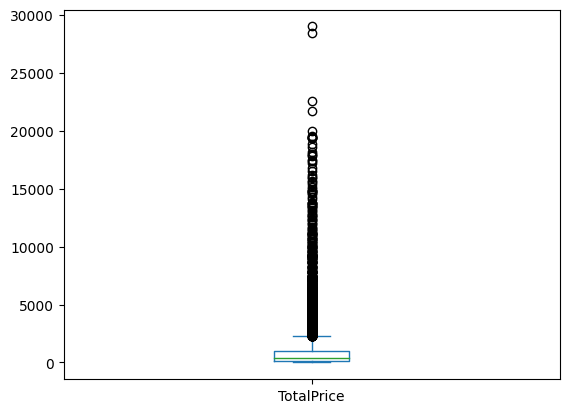

In [19]:
#check outliner menggunakan boxplot, semakin banyak jumlah lingkaran = semakin banyak outliner = semakin valid data.
sales.plot(kind = 'box', y=['TotalPrice'])
plt.show()

Tahap untuk Data Wrangling dan Data Cleaning sudah selesai, namun tidak menutup kemungkinan kita akan melakukan data cleaning kembali jika ditemukan impurities data saat di tahap analisa.

# Data Analisis & Data Visualization

Pada tahap ini, kita akan menganalisa dan memvisualisasi data baik dalam bentuk table matrix, plot, dll. Analisa data akan dimulai dari analisa umum lalu berlanjut ke analisa yang lebih mendalam. Untuk rangkuman analisa dan key insights akan dijabarkan lebih lengkap dalam tahap kesimpulan.

## Descriptive Analysis

Pada tahap analisis ini, kita akan menggali informasi dan mendeskripsikan data secara detail.

In [20]:
#terlihat bahwa sales tertinggi pada tahun 2018 dan terendah pada tahun 2017
sales.groupby(by= sales["OrderDate"].dt.year)["TotalPrice"].agg(penjualan="sum").style.format('{:,}')

,penjualan
OrderDate,
2017,"3,033,423.05"
2018,"4,984,362.49"
2019,"3,550,188.55"
2020,"769,837.7"


In [21]:
#analisa penjualan per bulan untuk mengecek trend penjualan
a = sales.pivot_table(index= sales["OrderDate"].dt.year, columns=sales["OrderDate"].dt.month, aggfunc='sum', values='TotalPrice')
a.round(2).style.format('{:,}')

OrderDate,1,2,3,4,5,6,7,8,9,10,11,12
OrderDate,,,,,,,,,,,,
2017,,,,,"168,406.59","263,612.23","204,287.41","312,809.07","334,434.93","402,083.79","438,816.05","908,972.98"
2018,"636,998.78","788,096.8","269,331.09","27,644.06","510,482.54","413,321.58","348,976.46","392,497.58","359,383.09","394,694.73","329,848.45","513,087.33"
2019,"449,243.58","488,371.24","133,849.34","26,467.99","285,279.94","254,810.8","252,848.67","296,558.77","271,592.37","287,510.62","276,073.13","527,582.1"
2020,"376,485.35","379,347.13","14,005.22",,,,,,,,,


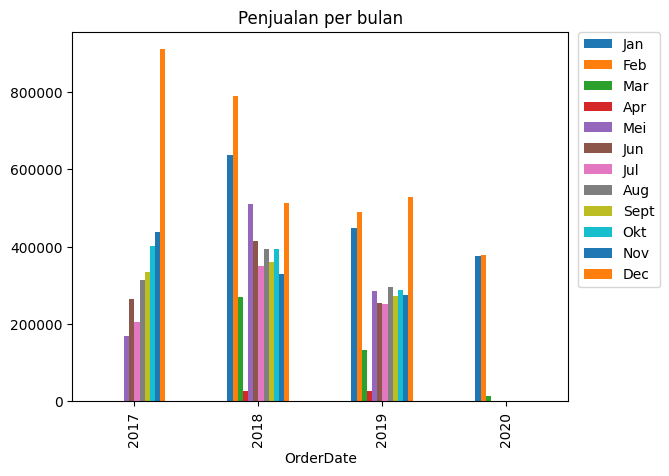

In [22]:
# analisa dalam bentuk bar chart
a.plot(kind="bar")
plt.title("Penjualan per bulan")
plt.legend(["Jan","Feb","Mar","Apr","Mei","Jun","Jul","Aug","Sept","Okt","Nov","Dec"],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

Bulan yang mengalami penjualan paling banyak adalah bulan 1,2 dan 12. Sedangkan bulan dengan penjualan terendah adalah bulan 4. Note: perlu diperhatikan bahwa data pada bulan 1-4 pada tahun 2017 dan bulan 4-12 pada tahun 2020 adalah kosong.Jadi kesimpulan yang tepat hanya bisa diambil pada tahun 2018 dan 2019

In [23]:
#menghitung sales berdasarkan stores country dan tahun 
a = sales.pivot_table(index = sales["OrderDate"].dt.year, columns = sales["StoreCountry"], aggfunc ="sum", values =["TotalPrice"]).round(decimals=2)
a.columns = a.columns.droplevel(0)
a.round(2).style.format('{:,}')

StoreCountry,Australia,Canada,France,Germany,Italy,Netherlands,Online,United Kingdom,United States
OrderDate,,,,,,,,,
2017,"68,617.45","213,807.58","43,605.29","177,457.9","9,786.0","68,995.6","1,446,750.43","166,462.31","837,940.49"
2018,"119,350.65","206,200.98","57,473.31","238,080.47","42,347.35","119,631.09","2,899,363.42","213,686.89","1,088,228.33"
2019,"103,983.37","183,553.35","24,091.51","109,375.48","13,797.12","79,988.21","2,272,720.76","139,704.12","622,974.63"
2020,"33,485.8","45,210.41","3,170.09","27,321.53","4,732.59","42,682.39","476,538.34","16,846.29","119,850.26"


AxesSubplot(0.125,0.11;0.775x0.77)
1.Penjualan terbanyak adalah melalui online store, disusul oleh offline store United States
2.Gap penjualan antara offline store United States dan offline store lainnya cukup jauh
3.Gap penjualan antar offline stores selain United States tidak terpaut jauh


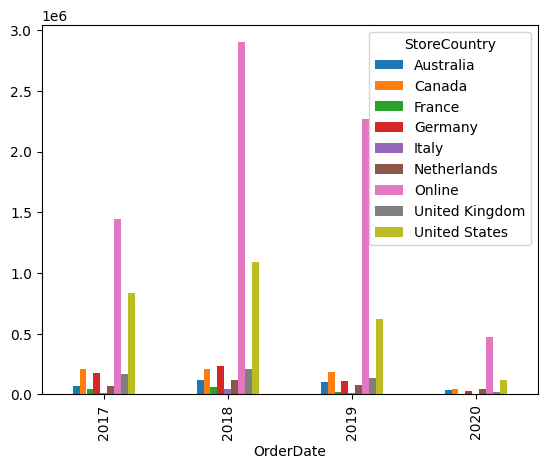

In [24]:
#menghitung sales berdasarkan stores country dan tahun dengan barplot.
print(a.plot.bar())
print("1.Penjualan terbanyak adalah melalui online store, disusul oleh offline store United States")
print("2.Gap penjualan antara offline store United States dan offline store lainnya cukup jauh")
print("3.Gap penjualan antar offline stores selain United States tidak terpaut jauh")

In [25]:
#Menghitung kontribusi penjualan dari stores per tahun (dalam persen)
a = sales.pivot_table(index="StoreCountry", columns=sales["OrderDate"].dt.year, aggfunc='sum', values="TotalPrice")
b = sales.groupby(by= sales["OrderDate"].dt.year)["TotalPrice"].agg('sum')
c = (a/b * 100)
c.round(decimals=2).astype(str) + "%"

OrderDate,2017,2018,2019,2020
StoreCountry,,,,
Australia,2.26%,2.39%,2.93%,4.35%
Canada,7.05%,4.14%,5.17%,5.87%
France,1.44%,1.15%,0.68%,0.41%
Germany,5.85%,4.78%,3.08%,3.55%
Italy,0.32%,0.85%,0.39%,0.61%
Netherlands,2.27%,2.4%,2.25%,5.54%
Online,47.69%,58.17%,64.02%,61.9%
United Kingdom,5.49%,4.29%,3.94%,2.19%
United States,27.62%,21.83%,17.55%,15.57%


In [26]:
a = sales.loc[(sales["StoreCountry"] == "Online").to_numpy()]
print("Pembelian terbesar dari online store ternyata berasal dari United States, disusul oleh germany, gap penjualannya juga terlihat cukup besar")
a.groupby(by = "CustomerCountry")["TotalPrice"].agg(penjualan="sum").round(decimals=2).style.format('{:,}')

Pembelian terbesar dari online store ternyata berasal dari United States, disusul oleh germany, gap penjualannya juga terlihat cukup besar


,penjualan
CustomerCountry,
Australia,"516,397.68"
Canada,"783,953.52"
France,"280,803.42"
Germany,"728,970.95"
Italy,"179,161.7"
Netherlands,"338,461.86"
United Kingdom,"438,718.78"
United States,"3,828,905.04"


In [27]:
#next step mari kita lakukan analisa penjualan per kategori produk
a = sales.pivot_table(index= ["StoreCountry"], columns = ["ProductCategory"], values= ["TotalPrice"], aggfunc="sum").round(decimals=2)
a.columns = a.columns.droplevel(0)
a.style.format('{:,}')

ProductCategory,Audio,Cameras and camcorders,Cell phones,Computers,Games and Toys,Home Appliances,"Music, Movies and Audio Books",TV and Video
StoreCountry,,,,,,,,
Australia,"8,235.22","27,483.87","62,796.38","120,146.25","1,508.82","27,778.19","31,889.64","45,598.9"
Canada,"12,632.88","21,898.57","120,967.2","267,596.82","4,217.99","91,038.45","45,553.79","84,866.62"
France,"1,162.31","24,755.97","33,651.8","38,252.7",986.04,"5,827.77","6,408.33","17,295.28"
Germany,"14,895.68","31,460.91","115,228.97","205,088.37","2,938.99","90,484.81","44,357.01","47,780.64"
Italy,"2,842.84","3,124.23","17,826.06","22,333.25",145.7,"9,895.41","3,859.67","10,635.9"
Netherlands,"7,931.44","15,465.79","58,539.29","100,268.44","5,323.19","71,579.46","18,987.75","33,201.93"
Online,"130,258.23","406,002.98","1,287,525.45","2,657,003.31","53,402.18","1,162,690.62","490,120.67","908,369.51"
United Kingdom,"11,608.56","22,861.25","89,869.55","180,850.08","2,673.63","100,958.45","24,625.84","103,252.25"
United States,"48,789.49","149,823.51","453,459.65","1,181,695.01","17,252.65","335,552.84","179,048.28","303,372.28"


Penjualan terlaris dari semua stores adalah kategori komputer


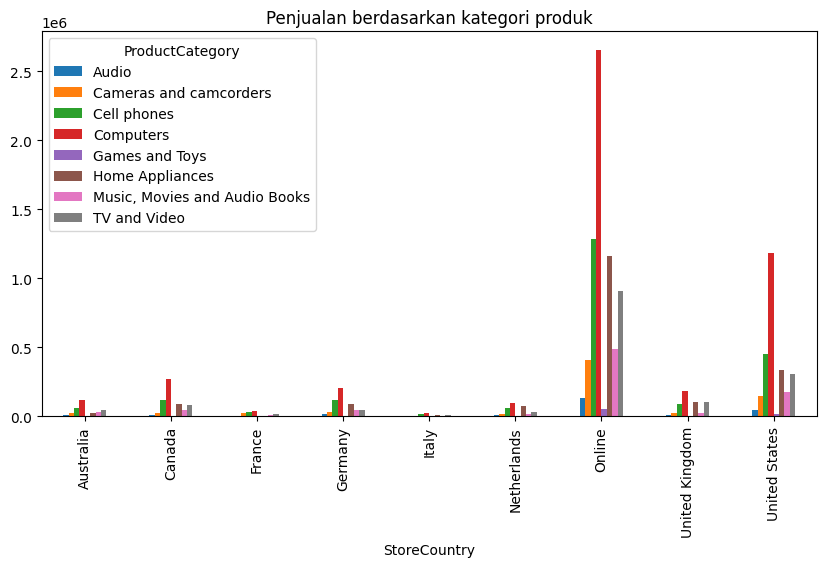

<Figure size 1920x1440 with 0 Axes>

In [28]:
a.plot(kind="bar", figsize=(10,5))
plt.title("Penjualan berdasarkan kategori produk")
plt.figure(dpi=300)
print("Penjualan terlaris dari semua stores adalah kategori komputer")

In [29]:
#menambah kolom baru sales yaitu sub kategori
sales["ProductSubCategory"] = products.loc[sales["ProductKey"].to_numpy()]["Subcategory"].to_numpy()

In [30]:
a = sales.loc[(sales["ProductCategory"] == "Computers").to_numpy()]
print("Penjualan terbesar terdapat pada subkategori desktops, projectors, laptops dan monitors")
a.groupby(by="ProductSubCategory")["TotalPrice"].agg(penjualan="sum").style.format('{:,}')

Penjualan terbesar terdapat pada subkategori desktops, projectors, laptops dan monitors


,penjualan
ProductSubCategory,
Computers Accessories,"67,404.54"
Desktops,"1,927,037.23"
Laptops,"986,617.12"
Monitors,"627,351.17"
"Printers, Scanners & Fax","230,049.54"
Projectors & Screens,"934,774.63"


In [31]:
# menambah kolom %profit pada sales
sales["%profit"] = ((sales["Profit"] / sales["NetPrice"]) * 100).round(decimals=2)

In [32]:
# %margin yang didapat rata2 cukup seimbang di antara semua produk.
sales.groupby(by = "ProductCategory")["%profit"].agg(Profit = "mean").round(decimals=2).astype(str) + "%"

,Profit
ProductCategory,
Audio,52.22%
Cameras and camcorders,53.97%
Cell phones,51.84%
Computers,51.55%
Games and Toys,49.61%
Home Appliances,50.75%
"Music, Movies and Audio Books",54.4%
TV and Video,50.83%


Rangkuman analisa sejauh ini:<br>
1.Store yang melakukan penjualan terbesar adalah online store disusul oleh offline store pada United States.<br>
2.Gap penjualan antara offline store united states dengan offline store negara lainnya terpaut cukup jauh.<br>
3.Customer online store kebanyakan dari negara United States, perbedaan gapnya juga cukup signifikan dibanding negara lain.<br>
4.Customer terbanyak PT.ABC berasal dari United States.<br>
5.Kategori produk terlaris berasal dari komputer dengan penjualan terbanyak pada desktop, laptop, projector, dan monitor.<br>

Next, kita akan menganalisa kenapa penjualan naik pada tahun 2018 dan drop di tahun berikutnya.

In [33]:
#rincian penjualan per kategori per tahun
a = sales.pivot_table(index= sales["OrderDate"].dt.year, columns = ["ProductCategory"], aggfunc='sum', values=["TotalPrice"]).round(decimals=2)
a.style.format('{:,}')

In [34]:
#menghitung persen kenaikan atau penurunan penjualan pertahun
a.agg(lambda x: (((x - x.shift()) / pd.Series.shift(x)) * 100), axis=0).rename(columns = {"TotalPrice":"Persen kenaikan penjualan dari tahun ke tahun"}, level=0, inplace=False).round(decimals=2).astype("str") + "%"

Persen kenaikan penjualan dari tahun ke tahun  \
ProductCategory                                         Audio   
OrderDate                                                       
2017                                                    <NA>%   
2018                                                   78.46%   
2019                                                  -11.08%   
2020                                                  -79.14%   

                                                                             \
ProductCategory Cameras and camcorders Cell phones Computers Games and Toys   
OrderDate                                                                     
2017                             <NA>%       <NA>%     <NA>%          <NA>%   
2018                            61.33%      83.36%    36.99%         82.29%   
2019                           -12.34%     -32.94%   -30.47%          3.44%   
2020                           -80.93%     -75.89%   -79.03%        -69.04%   

                                                                            
ProductCategory Home Appliances Music, Movies and Audio Books TV and Video  
OrderDate                                                                   
2017                      <NA>%                         <NA>%        <NA>%  
2018                    107.08%                       117.94%       68.61%  
2019                     -15.5%                        -37.5%      -38.92%  
2020                    -81.96%                       -73.43%      -75.91%

Penjelasan pada tabel diatas:<Br>
1.Tahun 2017 berisikan data NA karna kita tidak mempunyai data pada tahun 2016. Data penjualan pada tahun 2017 juga tidak lengkap, data dimulai dari bulan 4 - 12.<Br>
2.Data pada tahun 2020 tidak bisa digunakan sebagai acuan dikarenakan data penjualan tersebut tidak closing sampai bulan desember.<Br>
Analisa:<Br>
1.Pada tahun 2018 semua kategori produk mengalami peningkatan dalam penjualan, tertinggi dipegang oleh Home Appliances<Br>
2.Secara mengejutkan, pada tahun 2019 kategori games and toys adalah satu-satunya kategori yang tidak mengalami penurunan penjualan, mengapa hal ini bisa terjadi?? dikarenakan produk kategori ini bersifat komsumtif. Sebagai contoh produk video games bisa ditamatkan dalam hitungan hari, tentu ini akan membuat customer untuk membeli game2 lainnya, berbeda dengan pembelian produk laptop dimana produk tersebut akan dipakai bertahun-tahun.<BR>
3.Lanjut dari point 2, produk elektronik lainnya seperti audio, camera, cell phone, computer, dll mengalami penurunan dikarenakan barang tersebut dapat dipakai dalam jangka waktu yang lama.<Br>
4.Penurunan penjualan produk movies dvd (kategori music,movies and audiobooks hanya memiliki produk movies dvd)dikarenakan teknologi tersebut sudah mulai ditinggalkan. Zaman sekarang, produk komputer maupun laptop sudah dapat menggantikan dvd player dan memainkan film secara digital.<br>
Perlu diingat bahwa analisa diatas hanyalah asumsi pribadi, kita perlu menganalisa data lebih banyak lagi untuk dapat menarik kesimpulan yang tepat

In [35]:
#Menghitung return customer per tahun per store country. Return customer adalah customer yang belanja lebih dari 1 kali
a = pd.DataFrame([sales["OrderNumber"],sales["OrderDate"].dt.year, sales["StoreCountry"], sales["CustomerKey"]]).transpose()
a.drop_duplicates(inplace=True)
b = a.copy()
a = a.pivot_table(index= ["OrderDate"], columns = ["StoreCountry"], aggfunc= lambda x: (x.value_counts() > 1).sum(), values=["CustomerKey"])
b = b.pivot_table(index= ["OrderDate"], columns = ["StoreCountry"], aggfunc="count", values=["CustomerKey"])
c = ((a / b) * 100)
c.rename(columns = {"CustomerKey":"Jumlah return customer / total customer"}, level=0, inplace=True)
c.fillna(0, inplace=True)
c.round(decimals=2).astype(str) + "%"

Jumlah return customer / total customer                        \
StoreCountry                               Australia Canada France Germany   
OrderDate                                                                    
2017                                            0.0%   0.0%   0.0%    0.0%   
2018                                            0.0%  0.98%   0.0%    0.0%   
2019                                           1.67%  1.19%   0.0%   1.54%   
2020                                            0.0%   0.0%   0.0%    0.0%   

                                                                    
StoreCountry Italy Netherlands Online United Kingdom United States  
OrderDate                                                           
2017          0.0%        0.0%  0.53%           0.0%         0.91%  
2018          0.0%       1.85%  1.07%           0.0%         0.56%  
2019          0.0%        0.0%  0.36%           0.0%          0.0%  
2020          0.0%        0.0%   0.0%           0.0%          0.0%

Melihat data diatas, bahwa jumlah return customer sangat sedikit sekali di tiap store country, termasuk online store. ini berarti lebih dari 98% customer PT.ABC adalah customer yang hanya belanja 1x per tahun.

In [36]:
#Menghitung return customer per tahun per product category. Return customer adalah customer yang belanja lebih dari 1 kali
a = pd.DataFrame([sales["OrderNumber"],sales["OrderDate"].dt.year, sales["ProductCategory"], sales["CustomerKey"]]).transpose()
a.drop_duplicates(inplace=True)
b = a.copy()
a = a.pivot_table(index= ["OrderDate"], columns = ["ProductCategory"], aggfunc= lambda x: (x.value_counts() > 1).sum(), values=["CustomerKey"])
b = b.pivot_table(index= ["OrderDate"], columns = ["ProductCategory"], aggfunc="count", values=["CustomerKey"])
c = ((a / b) * 100)
c.rename(columns = {"CustomerKey":"Jumlah return customer / total customer"}, level=0, inplace=True)
c.fillna(0, inplace=True)
c.round(decimals=2).astype(str) + "%"

Jumlah return customer / total customer  \
ProductCategory                                   Audio   
OrderDate                                                 
2017                                               0.0%   
2018                                               0.0%   
2019                                               0.0%   
2020                                               0.0%   

                                                                             \
ProductCategory Cameras and camcorders Cell phones Computers Games and Toys   
OrderDate                                                                     
2017                              0.0%        0.0%     0.57%           0.0%   
2018                             0.47%       0.86%     0.64%          0.23%   
2019                              0.0%       0.48%      0.5%           0.0%   
2020                              0.0%        0.0%      0.0%           0.0%   

                                                                            
ProductCategory Home Appliances Music, Movies and Audio Books TV and Video  
OrderDate                                                                   
2017                       0.0%                         0.27%         0.0%  
2018                       0.0%                         0.73%        0.48%  
2019                       0.0%                         0.29%         0.0%  
2020                       0.0%                          0.0%         0.0%

Nah, untuk return customer per product category juga tidak kalah sedikit, tidak sampai 1% customer yang kembali, ini termasuk kategori games and toys dimana pada produk kategori ini mengalami kenaikan penjualan di tahun 2017 - 2019 namun return customernya sangat sedikit, yang artinya bahwa kenaikan penjualan dipicu oleh customer unique / customer baru.

In [37]:
#analisa performa lama pengiriman ke customer country
def analisacust (year = False):
    a = pd.DataFrame([sales["OrderNumber"],sales["CustomerCountry"], sales["DaysDuration"]]).transpose()
    if (year == False):
        a = a.loc[(sales["StoreCountry"] == "Online").to_numpy()]
    else:
        a = a.loc[((sales["StoreCountry"] == "Online") & (sales["OrderDate"].dt.year == year).to_numpy())]
    a.drop_duplicates(inplace=True)
    b = a.copy()
    b = b.groupby(by="CustomerCountry")["OrderNumber"].agg(["count"])
    c = pd.DataFrame({"CustCountry" : a["CustomerCountry"].unique() , "Days" : pd.Series(list(np.tile([1,3,5,7,10,14],len(a["CustomerCountry"].unique())).reshape(8,6))) })
    c = c.explode("Days", ignore_index = True)
    c["NumberofOrder"] = c.apply(lambda x: a.loc[( (a["CustomerCountry"] == x["CustCountry"]).to_numpy() & (a["DaysDuration"] <= x["Days"]) ).to_numpy()]["OrderNumber"].count(), axis=1).to_numpy()
    c = c.pivot_table(index="CustCountry", columns = "Days", values="NumberofOrder")
    return ((c / b.to_numpy()) * 100).round(decimals=2)
analisacust().astype(str) + "%" 

Days,1,3,5,7,10,14
CustCountry,,,,,,
Australia,16.53%,66.94%,97.11%,99.59%,100.0%,100.0%
Canada,18.46%,71.03%,93.08%,99.23%,100.0%,100.0%
France,12.9%,71.77%,92.74%,98.39%,100.0%,100.0%
Germany,11.49%,66.58%,95.56%,100.0%,100.0%,100.0%
Italy,18.03%,67.21%,93.44%,100.0%,100.0%,100.0%
Netherlands,15.53%,72.67%,96.27%,100.0%,100.0%,100.0%
United Kingdom,14.1%,64.53%,94.44%,99.57%,100.0%,100.0%
United States,14.81%,68.62%,95.33%,99.6%,99.94%,100.0%


Tabel diatas merupakan data penjualan online store tentang berapa lama paket sampai ke customer terhitung dari order date. Germany, Italy dan Netherlands adalah negara dengan penerimaan barang tercepat yaitu 100% barang diterima dari semua total pembelian dalam jangka waktu <= 7 hari. Bisa dilihat juga bahwa semua penerimaan barang oleh customer <= 5 hari rata2 diatas 90 persen.

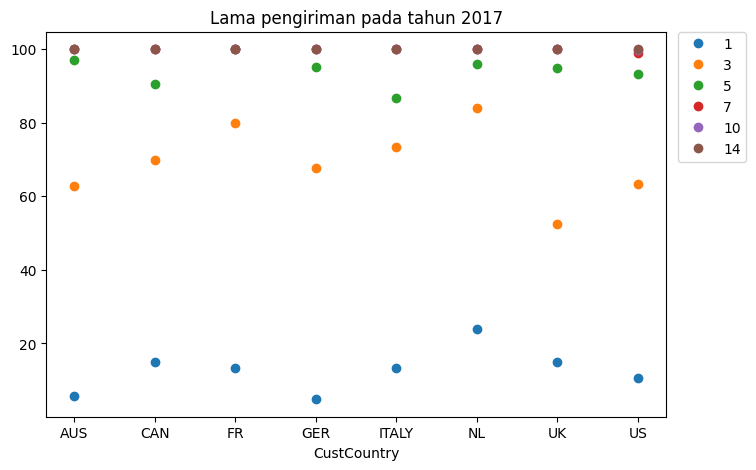

In [38]:
analisacust(2017).plot(kind="line", marker="o", linestyle="",figsize=(8,5))
plt.title("Lama pengiriman pada tahun 2017")
plt.xticks(np.arange(8),["AUS","CAN","FR","GER","ITALY","NL","UK","US"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

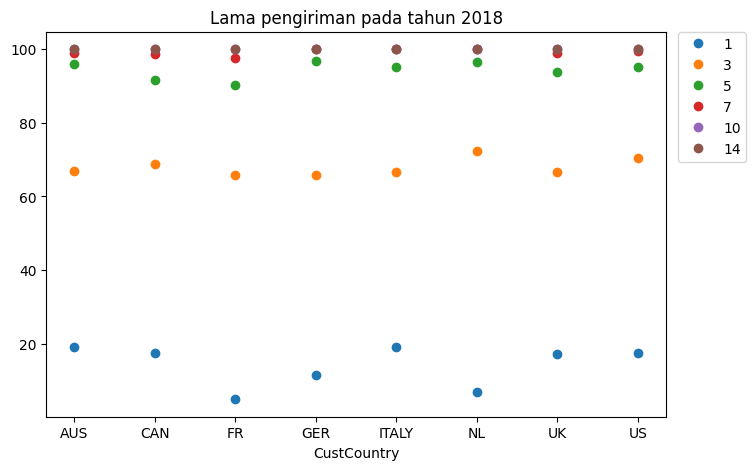

In [39]:
analisacust(2018).plot(kind="line", marker="o", linestyle="",figsize=(8,5))
plt.title("Lama pengiriman pada tahun 2018")
plt.xticks(np.arange(8),["AUS","CAN","FR","GER","ITALY","NL","UK","US"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

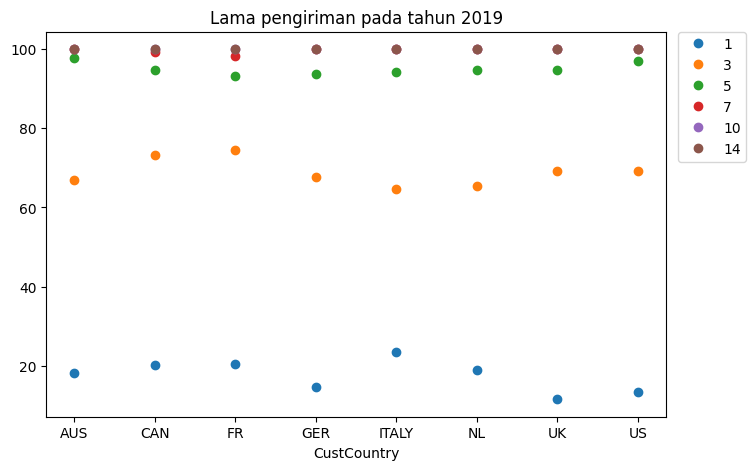

In [40]:
analisacust(2019).plot(kind="line", marker="o", linestyle="",figsize=(8,5))
plt.title("Lama pengiriman pada tahun 2019")
plt.xticks(np.arange(8),["AUS","CAN","FR","GER","ITALY","NL","UK","US"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

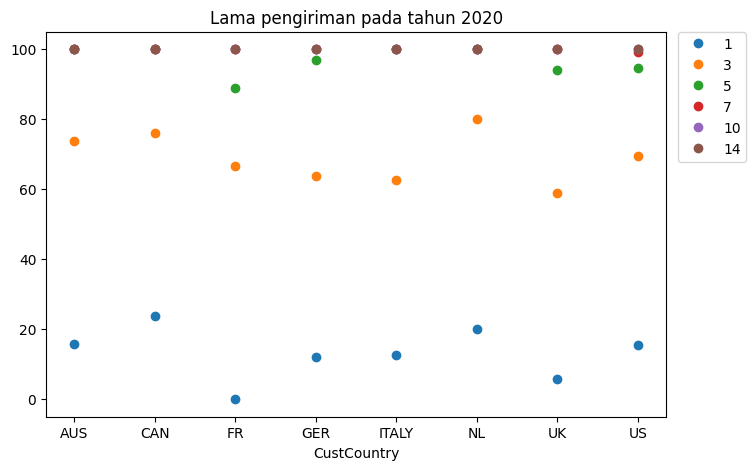

In [41]:
analisacust(2020).plot(kind="line", marker="o", linestyle="",figsize=(8,5))
plt.title("Lama pengiriman pada tahun 2020")
plt.xticks(np.arange(8),["AUS","CAN","FR","GER","ITALY","NL","UK","US"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

Berdasarkan grafik diatas, terlihat bahwa lama pengiriman cukup konsisten disetiap tahun. Untuk pengiriman 1 hari rata2 diangka 0 - 20an%, untuk pengiriman <= 3 hari ada diangka 60 - 80 persen dan pengiriman <= 5 hari ada diangka 90an persen.

Analisa untuk online store sudah selesai, next kita akan menganalisa penjualan pada offline store.

In [42]:
#menghitung jumlah offline store per store country dan performa penjualannya.
a = stores.loc[ (stores["Country"] != "Online").to_numpy()]
a = pd.DataFrame([a["Country"], a["Store Code"],a["SquareMeter"]]).transpose().reset_index(drop=True)
a = a.groupby(by = "Country")[["Store Code","SquareMeter"]].agg(JumlahStore = ("Store Code", lambda x: len(x.unique())), AVGluastoko = ("SquareMeter",'mean'))
a["Penjualan"] = a.apply(lambda x: sales.loc[ (sales["StoreCountry"] == x.name).to_numpy()]["TotalPrice"].sum(), axis=1)
a["Performance/sq.toko"] = a["Penjualan"] / (a["AVGluastoko"] * a["JumlahStore"])
a.round(decimals=2).style.format('{:,}')

,JumlahStore,AVGluastoko,Penjualan,Performance/sq.toko
Country,,,,
Australia,6,"1,751.43","325,437.27",30.97
Canada,5,"1,732.86","648,772.32",74.88
France,7,341.43,"128,340.2",53.7
Germany,9,"1,555.0","552,235.38",39.46
Italy,3,"1,433.33","70,663.06",16.43
Netherlands,5,"1,225.0","311,297.29",50.82
United Kingdom,7,"1,800.0","536,699.61",42.6
United States,24,"1,620.93","2,668,993.71",68.61


Penjelasan kolom data tabel diatas:<br>
1.Country = Negara dari store/toko.<br>
2.JumlahStore = Jumlah quantity store/toko.<br>
3.AVGluastoko = average/rata-rata luas dari toko-toko di suatu negara.<br>
4.Penjualan = total penjualan dari semua toko di suatu negara.<br>
5.Performance/sq.toko = Hasil penjualan toko dihitung per 1 sqrmeter toko.

Analisa:<br>
1.Walaupun penjualan di US merupakan yang tertinggi namun jika dihitung penjualan per sq/meter canada lah yang paling tinggi.<br>
2.Performa penjualan italy adalah yang terendah, disusul oleh australia. Mungkin ada baiknya jika dilakukan pengurangan offline store di kedua negara ini. UK juga cukup rendah diangka 42.6.

In [43]:
#Analisa warna produk favorit
a = pd.DataFrame([sales["ProductKey"],sales["ProductCategory"],sales["TotalPrice"]]).transpose()
a["ProductColor"] = products.loc[a["ProductKey"].to_numpy()]["Color"].to_numpy()
a = a.pivot_table(index="ProductColor", columns="ProductCategory",aggfunc='sum',values='TotalPrice')
a.fillna(0, inplace=True)
a.sort_values("Computers",ascending=False,inplace=True)
a.round(2).style.format('{:,}')


ProductCategory,Audio,Cameras and camcorders,Cell phones,Computers,Games and Toys,Home Appliances,"Music, Movies and Audio Books",TV and Video
ProductColor,,,,,,,,
Black,"47,018.71","145,074.58","769,605.03","1,573,187.75","19,981.47","87,297.87","240,986.01","447,283.71"
White,"41,408.35","70,197.3","362,689.83","1,454,003.34","8,500.44","300,132.47","197,571.6","289,029.96"
Silver,"35,344.79","54,604.8","248,826.34","946,538.31","15,829.63","396,645.48","267,242.32","371,611.0"
Brown,0.0,0.0,0.0,"406,455.52",0.0,"32,611.18",0.0,"446,448.64"
Blue,"26,439.25","84,639.64",0.0,"144,016.78","22,882.94","306,530.74","11,241.23",0.0
Red,"29,551.84",0.0,"11,853.18","143,627.72","4,718.81","178,793.84","14,065.5",0.0
Grey,0.0,"114,447.17","387,722.84","69,952.75","1,107.44","262,289.07","71,521.23",0.0
Green,"14,944.86","26,679.96",0.0,"29,793.74",400.32,"191,342.95",0.0,0.0
Yellow,"11,484.63",179.48,0.0,"3,278.4","4,984.95","11,171.88","2,456.78",0.0


Warna favorit untuk 3 kategori produk terlaku:<br>
1.Untuk kategori produk komputer warna favorit adalah : black, white dan silver.<br>
2.Untuk kategori produk cell phones warna favorit adalah : black, grey, gold dan white.<br>
3.Untuk kategori produk home appliances warna favorit adalah: silver, blue dan white.

## Diagnostic Analysis

Pada tahap analisa ini, kita akan berfokus menjawab pertanyaan 'Faktor apa saja yang mempengaruhi nilai total penjualan?'. Hasil analisa hanya berfokus pada offline store dan pada tahun 2019.

In [44]:
#brainstorming semua variabel yang memiliki efek terhadap penjualan pada offline store di tahun 2019.
#analisa variabel yang akan digunakan adalah : rata2 discount, jumlah PO, jumlah qty barang
a = sales[(sales['StoreCountry'] == 'United States') & (sales['OrderDate'].dt.year == 2019)]
a = a.groupby(by=['StoreCountry',sales['OrderDate'].dt.month])[['Profit','%Discount','OrderNumber','Quantity','TotalPrice']].agg(AvgDiscGiven = ('%Discount','mean'), TotalOrderQty = ('OrderNumber','count'), Quantity=('Quantity','sum'),TotalPrice=('TotalPrice','sum'))
a.sort_values('TotalPrice',inplace=True,ascending=False)
a

AvgDiscGiven  TotalOrderQty  Quantity  TotalPrice
StoreCountry  OrderDate                                                   
United States 2              0.064483            116       366   121608.45
              12             0.070840            131       407   103011.33
              10             0.056437             87       256    88907.14
              1              0.052791             86       247    57114.56
              8              0.058788             66       209     47812.4
              7              0.058923             65       193    46857.25
              11             0.063455             55       159    44070.23
              5              0.051212             66       189    29808.66
              3              0.068222             45       122    27246.16
              6              0.063382             68       185    27169.84
              9              0.042000             40       137    23825.88
              4              0.055000              8        27     5542.73

In [45]:
#Mengecek multivariate outlier menggunakan Mahalanobis Distance dan chi2 effect.
#Membuat fungsi mencari nilai mahalanobis.
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.astype(float).values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

In [46]:
a['mahalNum'] = mahalanobis(x=a, data=a[['AvgDiscGiven','TotalOrderQty','Quantity','TotalPrice']])

C:\Users\verti\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [47]:
a

AvgDiscGiven  TotalOrderQty  Quantity  TotalPrice  \
StoreCountry  OrderDate                                                      
United States 2              0.064483            116       366   121608.45   
              12             0.070840            131       407   103011.33   
              10             0.056437             87       256    88907.14   
              1              0.052791             86       247    57114.56   
              8              0.058788             66       209     47812.4   
              7              0.058923             65       193    46857.25   
              11             0.063455             55       159    44070.23   
              5              0.051212             66       189    29808.66   
              3              0.068222             45       122    27246.16   
              6              0.063382             68       185    27169.84   
              9              0.042000             40       137    23825.88   
              4              0.055000              8        27     5542.73   

                         mahalNum  
StoreCountry  OrderDate            
United States 2          4.966153  
              12         6.521073  
              10         5.625358  
              1          3.286853  
              8          1.482616  
              7          0.034531  
              11         1.269293  
              5          2.752122  
              3          3.614715  
              6           3.56049  
              9          6.232041  
              4          4.654755

Cek dengan table chi square dibawah, jika mahalNum lebih dari 12.6 maka data tersebut merupakan outlier.

<img src="image.png" alt="Drawing" style="width: 500px; height: 400px"/>


In [48]:
#Menggunakan library pingouin untuk menampilkan hasil p-value dari linear regression.
import pingouin as pg
b = pg.linear_regression(a[['TotalOrderQty','Quantity','AvgDiscGiven']].astype(float), a.TotalPrice.astype(float) )
b

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-30263.067519,33105.028908,-0.914153,0.387358,0.878914,0.833507,-1.066034e+05,4.607727e+04
1,TotalOrderQty,-1105.647651,1170.768445,-0.944378,0.372620,0.878914,0.833507,-3.805445e+03,1.594149e+03
2,Quantity,656.470783,369.217462,1.778006,0.113295,0.878914,0.833507,-1.949462e+02,1.507888e+03
3,AvgDiscGiven,379753.631670,627399.350137,0.605282,0.561765,0.878914,0.833507,-1.067032e+06,1.826539e+06


In [49]:
#membuat variable pval dan r2 untuk menampung semua hasil pada offline store
analyze = pd.DataFrame([b.pval,b.r2]).transpose()
analyze.columns = ['USpval','USr2']
analyze

,USpval,USr2
0,0.387358,0.878914
1,0.372620,0.878914
2,0.113295,0.878914
3,0.561765,0.878914


In [50]:
#next kita menganalisa linear regression untuk semua negara pada offline store.
a = sales[(sales['StoreCountry'] == 'Australia') & (sales['OrderDate'].dt.year == 2019)]
a = a.groupby(by=['StoreCountry',sales['OrderDate'].dt.month])[['Profit','%Discount','OrderNumber','Quantity','TotalPrice']].agg(AvgDiscGiven = ('%Discount','mean'), TotalOrderQty = ('OrderNumber','count'), Quantity=('Quantity','sum'),TotalPrice=('TotalPrice','sum'))
a.sort_values('TotalPrice',inplace=True,ascending=False)
a['mahalNum'] = mahalanobis(x=a, data=a[['AvgDiscGiven','TotalOrderQty','Quantity','TotalPrice']])
a

C:\Users\verti\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AvgDiscGiven  TotalOrderQty  Quantity  TotalPrice  \
StoreCountry OrderDate                                                      
Australia    1              0.076250             24        72    22694.16   
             12             0.075714             28        79    17651.51   
             2              0.066400             25        80    14977.99   
             9              0.043750              8        29    12221.83   
             8              0.034545             11        42    11517.25   
             11             0.076471             17        43     5850.53   
             5              0.068000              5        18     5589.11   
             10             0.071000             10        36     5416.22   
             6              0.059167             12        36     3479.29   
             7              0.032000             10        31     3085.45   
             4              0.035000              4        14     1500.03   

                        mahalNum  
StoreCountry OrderDate            
Australia    1           4.60374  
             12          3.52216  
             2           5.23623  
             9          3.304816  
             8          3.251883  
             11         4.357379  
             5          3.930531  
             10         4.459905  
             6          1.300606  
             7          3.576082  
             4          2.456669

In [51]:
b = pg.linear_regression(a[['TotalOrderQty','Quantity','AvgDiscGiven']].astype(float), a.TotalPrice.astype(float) )
analyze['AUSpvalue'] = b['pval']
analyze['AUSr2'] = b['r2']

In [52]:
a = sales[(sales['StoreCountry'] == 'Canada') & (sales['OrderDate'].dt.year == 2019)]
a = a.groupby(by=['StoreCountry',sales['OrderDate'].dt.month])[['Profit','%Discount','OrderNumber','Quantity','TotalPrice']].agg(AvgDiscGiven = ('%Discount','mean'), TotalOrderQty = ('OrderNumber','count'), Quantity=('Quantity','sum'),TotalPrice=('TotalPrice','sum'))
a.sort_values('TotalPrice',inplace=True,ascending=False)
a['mahalNum'] = mahalanobis(x=a, data=a[['AvgDiscGiven','TotalOrderQty','Quantity','TotalPrice']])
a

C:\Users\verti\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AvgDiscGiven  TotalOrderQty  Quantity  TotalPrice  \
StoreCountry OrderDate                                                      
Canada       1              0.057727             44       136    36815.21   
             2              0.085000             22        73    33032.26   
             9              0.082857              7        27    20392.43   
             7              0.059259             27        83    20200.15   
             5              0.065556             27       102    17714.01   
             6              0.050625             16        45    14821.13   
             12             0.054000             20        67    13241.92   
             10             0.049286             14        40     10185.6   
             11             0.063571             14        49     7592.04   
             3              0.037000             10        38     6964.15   
             8              0.080000              7        13     2594.45   

                        mahalNum  
StoreCountry OrderDate            
Canada       1          6.046866  
             2          4.409388  
             9          4.726421  
             7          1.009733  
             5          6.266346  
             6          2.009306  
             12         0.560505  
             10         1.589117  
             11         1.477362  
             3          4.923004  
             8          6.981952

In [53]:
b = pg.linear_regression(a[['TotalOrderQty','Quantity','AvgDiscGiven']].astype(float), a.TotalPrice.astype(float) )
analyze['CANpvalue'] = b['pval']
analyze['CANr2'] = b['r2']

In [54]:
a = sales[(sales['StoreCountry'] == 'France') & (sales['OrderDate'].dt.year == 2019)]
a = a.groupby(by=['StoreCountry',sales['OrderDate'].dt.month])[['Profit','%Discount','OrderNumber','Quantity','TotalPrice']].agg(AvgDiscGiven = ('%Discount','mean'), TotalOrderQty = ('OrderNumber','count'), Quantity=('Quantity','sum'),TotalPrice=('TotalPrice','sum'))
a.sort_values('TotalPrice',inplace=True,ascending=False)
a['mahalNum'] = mahalanobis(x=a, data=a[['AvgDiscGiven','TotalOrderQty','Quantity','TotalPrice']])
a

C:\Users\verti\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AvgDiscGiven  TotalOrderQty  Quantity  TotalPrice  \
StoreCountry OrderDate                                                      
France       1              0.089000             10        37     8845.75   
             10             0.077692             13        27     7125.72   
             2              0.022000              5        12     2072.46   
             11             0.050000              4        13     1764.57   
             12             0.041429              7        10     1373.95   
             6              0.100000              1         3       996.3   
             7              0.120000              1         2      879.82   
             5              0.000000              1         5      549.95   
             9              0.000000              2         3      482.99   

                        mahalNum  
StoreCountry OrderDate            
France       1          6.018931  
             10          5.62755  
             2          0.729058  
             11         3.420087  
             12         3.974482  
             6          2.414919  
             7          3.836142  
             5          2.743381  
             9           3.23545

In [55]:
b = pg.linear_regression(a[['TotalOrderQty','Quantity','AvgDiscGiven']].astype(float), a.TotalPrice.astype(float) )
analyze['FRANpvalue'] = b['pval']
analyze['FRANr2'] = b['r2']

In [56]:
a = sales[(sales['StoreCountry'] == 'Germany') & (sales['OrderDate'].dt.year == 2019)]
a = a.groupby(by=['StoreCountry',sales['OrderDate'].dt.month])[['Profit','%Discount','OrderNumber','Quantity','TotalPrice']].agg(AvgDiscGiven = ('%Discount','mean'), TotalOrderQty = ('OrderNumber','count'), Quantity=('Quantity','sum'),TotalPrice=('TotalPrice','sum'))
a.sort_values('TotalPrice',inplace=True,ascending=False)
a['mahalNum'] = mahalanobis(x=a, data=a[['AvgDiscGiven','TotalOrderQty','Quantity','TotalPrice']])
a

C:\Users\verti\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AvgDiscGiven  TotalOrderQty  Quantity  TotalPrice  \
StoreCountry OrderDate                                                      
Germany      7              0.055000             22        63    19140.72   
             5              0.074286             14        51    16025.84   
             1              0.048000             30        98    15239.25   
             12             0.070952             21        59    12201.69   
             9              0.102222              9        25      9038.2   
             11             0.062222              9        36     8361.09   
             10             0.063000             10        30     8127.57   
             8              0.040000             11        24     7331.21   
             2              0.046250             16        58     5838.06   
             6              0.057500             12        32     3684.84   
             4              0.076000              5        17     2982.38   
             3              0.070000              4         9     1404.63   

                        mahalNum  
StoreCountry OrderDate            
Germany      7          4.900712  
             5          4.736786  
             1          5.931639  
             12         3.379103  
             9          5.704125  
             11         2.923871  
             10          0.47604  
             8          5.709021  
             2          4.135951  
             6          2.112243  
             4          1.822016  
             3          2.168493

In [57]:
b = pg.linear_regression(a[['TotalOrderQty','Quantity','AvgDiscGiven']].astype(float), a.TotalPrice.astype(float) )
analyze['GERpvalue'] = b['pval']
analyze['GERr2'] = b['r2']

In [58]:
a = sales[(sales['StoreCountry'] == 'Italy') & (sales['OrderDate'].dt.year == 2019)]
a = a.groupby(by=['StoreCountry',sales['OrderDate'].dt.month])[['Profit','%Discount','OrderNumber','Quantity','TotalPrice']].agg(AvgDiscGiven = ('%Discount','mean'), TotalOrderQty = ('OrderNumber','count'), Quantity=('Quantity','sum'),TotalPrice=('TotalPrice','sum'))
a.sort_values('TotalPrice',inplace=True,ascending=False)
a['mahalNum'] = mahalanobis(x=a, data=a[['AvgDiscGiven','TotalOrderQty','Quantity','TotalPrice']])
a

C:\Users\verti\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AvgDiscGiven  TotalOrderQty  Quantity  TotalPrice  \
StoreCountry OrderDate                                                      
Italy        12             0.048000              5        14     5197.68   
             2              0.064286              7        18     3171.04   
             3              0.083750              8        14     2543.04   
             9              0.000000              1         8      2136.0   
             10             0.040000              5         8      749.36   

                       mahalNum  
StoreCountry OrderDate           
Italy        12             3.2  
             2              3.2  
             3              3.2  
             9              3.2  
             10             3.2

In [59]:
b = pg.linear_regression(a[['TotalOrderQty','Quantity','AvgDiscGiven']].astype(float), a.TotalPrice.astype(float) )
analyze['ITLpvalue'] = b['pval']
analyze['ITLr2'] = b['r2']

In [60]:
a = sales[(sales['StoreCountry'] == 'Netherlands') & (sales['OrderDate'].dt.year == 2019)]
a = a.groupby(by=['StoreCountry',sales['OrderDate'].dt.month])[['Profit','%Discount','OrderNumber','Quantity','TotalPrice']].agg(AvgDiscGiven = ('%Discount','mean'), TotalOrderQty = ('OrderNumber','count'), Quantity=('Quantity','sum'),TotalPrice=('TotalPrice','sum'))
a.sort_values('TotalPrice',inplace=True,ascending=False)
a['mahalNum'] = mahalanobis(x=a, data=a[['AvgDiscGiven','TotalOrderQty','Quantity','TotalPrice']])
a

C:\Users\verti\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AvgDiscGiven  TotalOrderQty  Quantity  TotalPrice  \
StoreCountry OrderDate                                                      
Netherlands  12             0.049375             16        51    22593.16   
             8              0.062000              5        18     8474.39   
             5              0.047857             14        41     8054.55   
             2              0.063333             12        46     7630.51   
             1              0.080000              7        30     6973.74   
             9              0.081667              6        24      6790.9   
             3              0.087500              8        22     6511.06   
             11             0.061667             12        35     4748.78   
             7              0.082500              8        14     3649.85   
             6              0.048000              5        16     2978.48   
             10             0.044000              5        10      800.39   
             4              0.073333              3         6       782.4   

                        mahalNum  
StoreCountry OrderDate            
Netherlands  12         8.828489  
             8          2.660683  
             5          3.392188  
             2          4.543331  
             1          2.978385  
             9          2.152569  
             3           2.61999  
             11         2.640024  
             7          5.270048  
             6          2.805979  
             10         4.161982  
             4          1.946332

In [61]:
b = pg.linear_regression(a[['TotalOrderQty','Quantity','AvgDiscGiven']].astype(float), a.TotalPrice.astype(float) )
analyze['NDLpvalue'] = b['pval']
analyze['NDLr2'] = b['r2']

In [62]:
a = sales[(sales['StoreCountry'] == 'United Kingdom') & (sales['OrderDate'].dt.year == 2019)]
a = a.groupby(by=['StoreCountry',sales['OrderDate'].dt.month])[['Profit','%Discount','OrderNumber','Quantity','TotalPrice']].agg(AvgDiscGiven = ('%Discount','mean'), TotalOrderQty = ('OrderNumber','count'), Quantity=('Quantity','sum'),TotalPrice=('TotalPrice','sum'))
a.sort_values('TotalPrice',inplace=True,ascending=False)
a['mahalNum'] = mahalanobis(x=a, data=a[['AvgDiscGiven','TotalOrderQty','Quantity','TotalPrice']])
a

C:\Users\verti\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AvgDiscGiven  TotalOrderQty  Quantity  TotalPrice  \
StoreCountry   OrderDate                                                      
United Kingdom 2              0.024615             13        66    40072.22   
               10             0.068333             12        41    18406.61   
               1              0.051818             22        81    17620.97   
               5              0.067273             22        61    16329.63   
               8              0.078889              9        33    10394.29   
               9              0.064286             21        84     9073.07   
               12             0.046429             14        43     8071.77   
               11             0.044444              9        31     6889.99   
               7              0.058571              7        30     6615.68   
               6              0.063000             10        26     5363.14   
               4              0.000000              1         3       657.0   
               3              0.000000              2         9      209.75   

                          mahalNum  
StoreCountry   OrderDate            
United Kingdom 2          9.111482  
               10         2.006258  
               1          2.989476  
               5          6.273096  
               8          3.649416  
               9          6.826547  
               12         0.886098  
               11         0.253036  
               7          2.371012  
               6          1.679965  
               4          4.025758  
               3          3.927854

In [63]:
b = pg.linear_regression(a[['TotalOrderQty','Quantity','AvgDiscGiven']].astype(float), a.TotalPrice.astype(float) )
analyze['UKpvalue'] = b['pval']
analyze['UKr2'] = b['r2']
#membuang interpreter.
analyze = analyze.loc[1: , :]
analyze.index = ['TotalOrderQty','Quantity','AvgDiscGiven']
analyze

,USpval,USr2,AUSpvalue,AUSr2,CANpvalue,CANr2,FRANpvalue,FRANr2,GERpvalue,GERr2,ITLpvalue,ITLr2,NDLpvalue,NDLr2,UKpvalue,UKr2
TotalOrderQty,0.372620,0.878914,0.416118,0.715633,0.504436,0.719056,0.685744,0.970307,0.392210,0.643182,0.493524,0.752186,0.883251,0.580657,0.323354,0.485288
Quantity,0.113295,0.878914,0.152253,0.715633,0.923920,0.719056,0.003522,0.970307,0.898829,0.643182,0.408096,0.752186,0.281390,0.580657,0.090659,0.485288
AvgDiscGiven,0.561765,0.878914,0.828156,0.715633,0.101114,0.719056,0.137649,0.970307,0.256886,0.643182,0.542272,0.752186,0.981551,0.580657,0.961862,0.485288


<AxesSubplot: >

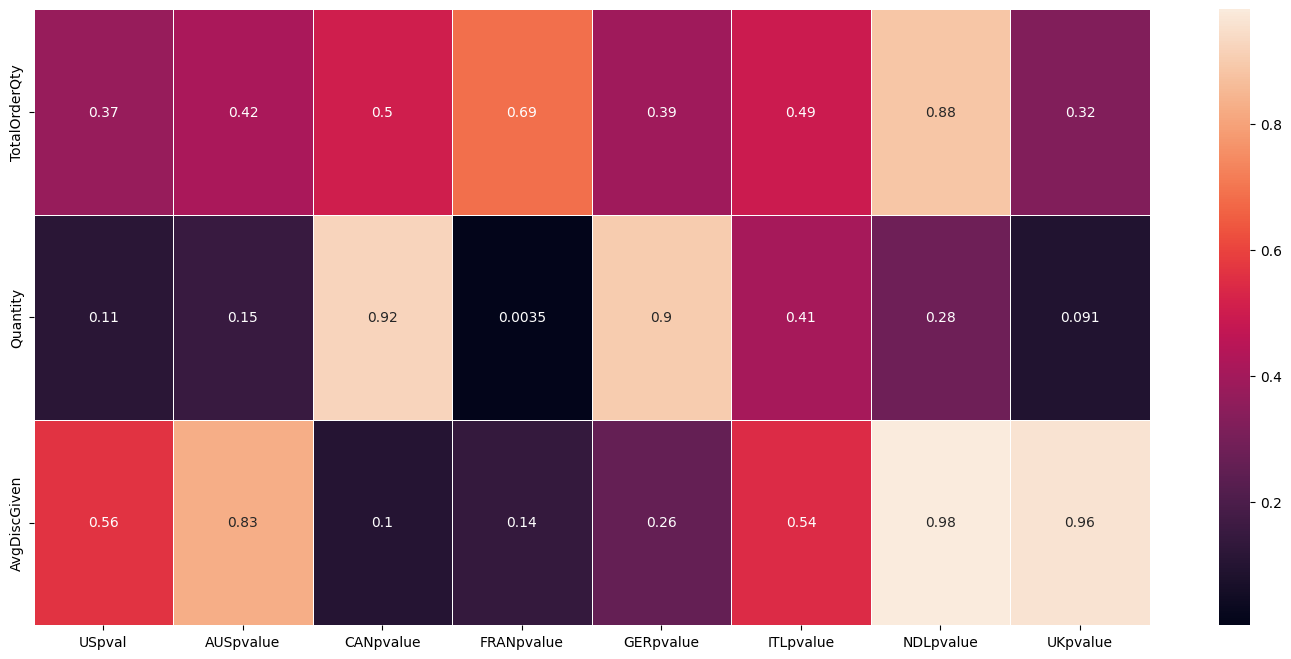

In [64]:
import seaborn as sns
analyzeP = analyze.iloc[:, 0::2]
analyzeR = analyze.iloc[:, 1::2]
#Menunjukan hasil pvalue dalam bentuk heatmap.
plt.figure(figsize=(18, 8))
sns.heatmap(analyzeP, annot=True, linewidth=0.5 )

Penjelasan = Pvalue merupakan angka signifikansi dari suatu independen variabel (TotalOrderQty,Quantity,AvgDiscGiven) terhadap dependen variabel (TotalPrice). Nilai Pvalue adalah 0< pval <1. Singkatnya, semakin pvalue mendekati 0 maka semakin berpengaruh independen variabel terhadap dependen variabel. Contoh, pada negara USA pvalue dari quantitynya adalah 0.11 sedangkan pada Germany adalah 0.9. Ini artinya semakin tinggi quantity maka semakin tinggi pula penjualannya pada USA tetapi hal ini tidak berlaku pada Germany dikarenakan pvalue yang hampir mendekati angka 1. Semakin dekat pvalue dengan angka 1, maka semakin tidak berhubungan variabel tersebut. Dalam kasus Germany, bisa diartikan bahwa quantity sama sekali tidak mempengaruhi penjualan.<br>
Catatan penting : Model ini akan semakin baik, jika independen variabel yang diperlukan dihadirkan semakin banyak.Jika independen variabel semakin sedikit, maka akurasi pvalue akan semakin rendah. 

<AxesSubplot: >

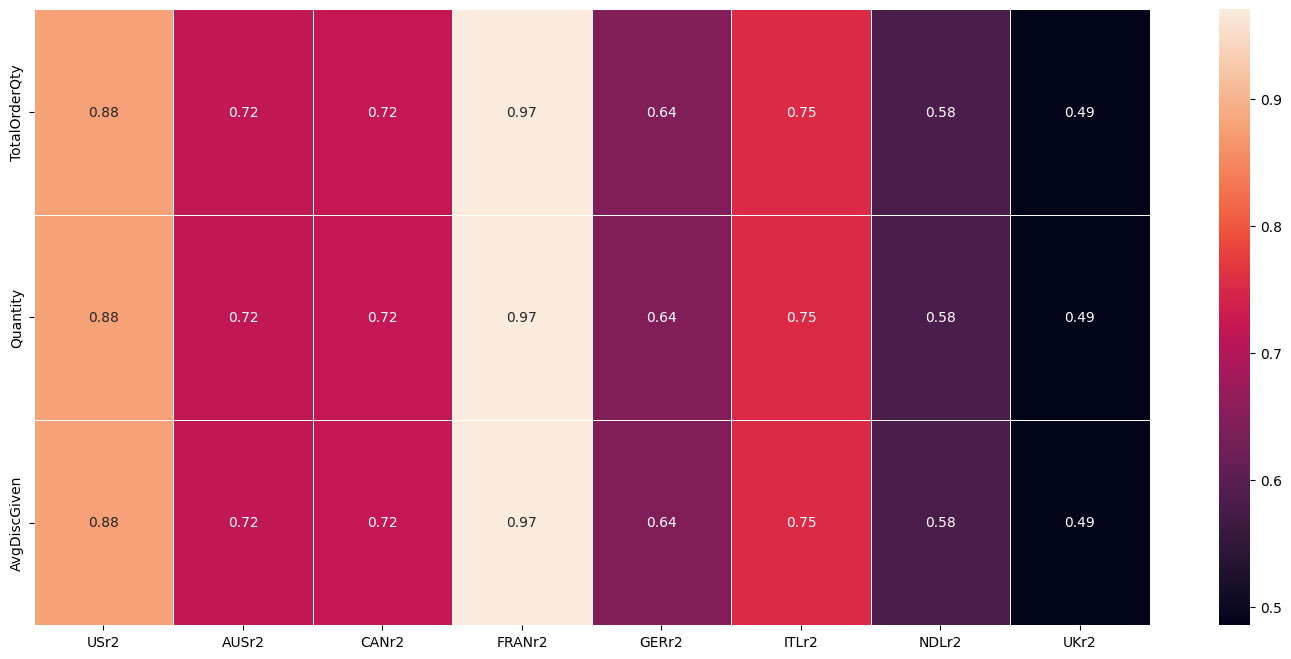

In [65]:
#Menunjukan hasil rvalue dalam bentuk heatmap.
plt.figure(figsize=(18, 8))
sns.heatmap(analyzeR, annot=True, linewidth=0.5 )

r2 adalah tingkat variansi dalam suatu variabel, nilai r2 adalah 0 < r2 < 1. Semakin tinggi angka r2 maka variansi akan semakin sedikit. 

# KESIMPULAN

Rangkuman:<br>
1.Catatan : Perlu diperhatikan bahwa data yang didapat di bulan 2017 dan 2020 tidak full, pada tahun 2017 data bulan 1-4 adalah  kosong dan pada tahun 2020 data bulan 4 - 12 juga kosong. Analisa reliable hanya terdapat pada tahun 2018 dan 2019 saja.<br>
2.Penjualan tertinggi ada pada tahun 2018. Trend penjualan naik dari tahun 2017 - 2018, lalu turun sampai ke tahun 2020.<br>
3.Penjualan tertinggi ada pada online store dengan kontribusi penjualan ada di 47.69%(2017), 58.17%(2018), 64.02%(2019),	     61.9%(2020)<br>
3.Penjualan tertinggi untuk offline store ada di United States, gap penjualan antara US dan toko offline lainnya terpaut cukup   jauh.(dijelaskan pada barplot diatas)<br>
4.Bulan dengan penjualan tertinggi ada pada bulan januari, februari dan december. Terendah ada pada bulan april.<br>
5.Pada Online Store, customer dengan pembelian tertinggi ada di United States, sedangkan yang terendah ada pada Italy.<br>
6.Kategori produk terlaris adalah komputer dengan subkategori terlaris ada di desktops, laptops dan projector & screens.<br>
7.Pengambilan profit di semua kategori produk cukup seimbang yaitu ada diangka +- 50%.<br>
8.Kenaikan penjualan dari tahun ke tahun paling besar adalah dari tahun 2017 - 2018, ini dikarenakan penjualan dari tahun 2017   tidak lengkap sehingga terlihat kenaikan yang menjomplang pada tahun 2018. <br>
9.Pada tahun 2018-2019 semua produk mengalami penurunan penjualan kecuali kategori Games and Toys.<br>
10.Return customer (customer yang belanja lebih dari 1 x per tahun) pada semua store jumlahnya sangat sedikit sekali yaitu       dibawah 2%.<br>
11.Untuk online store, performa pengiriman disetiap tahun rata2 diatas 90% barang sampai ke customer dalam waktu <5 hari.(data   lengkap ada diatas).<br>
12.Performance penjualan offline store per total luas toko yang paling rendah ada pada negara italy, sedangkan yang paling       tinggi ada pada negara Canada. Walaupun penjualan tertinggi secara global ada pada US namun jika kita menghitung berdasrakan   jumlah dan luas tokonya maka canada lah yang paling tinggi.<br>
13.Warna favorit dari kategori produk terlaris adalah hitam, putih dan silver.


Keyinsights / saran:<br>
1.Untuk menutup 1 atau semua offline store pada negara italy, karena performa penjualan yang sangat buruk.Italy juga salah satu customer country pada online store dengan pembelian paling rendah.<br>
2.Pembelian dari online store dari tahun ke tahun juga semakin naik kecuali untuk tahun 2020 (dikarenakan tahun 2020 datanya tidak lengkap), semakin naiknya penjualan online store maka pengurangan offline store juga sebaiknya dilakukan secara bertahap dimulai dari performance/sqstores paling rendah.<br>
3.Tetapi khusus untuk store di United States, untuk dapat menambah lebih banyak store lagi dikarenakan customer terbesar dari PT.ABC berasal dari United States.<br>
4.Return customer rendah dikarenakan penjualan produk yang bersifat komsumtif jangka pendek seperti games and toys sangat rendah. Sedangkan untuk produk yang jangka panjang seperti komputer, laptop dan hp justru penjualannya sangat tinggi.<br>
5.Untuk meningkatkan return customer, maka penjualan produk konsumtif jangka pendek harus dinaikan yaitu dengan cara menurunkan harga atau memberikan diskon di produk tersebut. Bisa dilihat bahwa pengambilan profit untuk produk tersebut ada disekitar +-50%, profit tersebut bisa dikurangkan untuk menurunkan harga produk.<br>
6.Performa pengiriman barang Online Store dari tahun ke tahun cukup stagnant yaitu 0 - 20% barang sampai ke customer di hari pertama, 60 -80% di hari ketiga dan >90% di hari kelima. Tingkatkan layanan kurir untuk menekan pengiriman barang sampai >90% pada hari ketiga. Semakin cepat barang sampai ke konsumen maka penjualan akan semakin bagus karena akan mengundang repeat/return customer.<br>
7.Pada bulan Januari, Februari dan December penjualan sedang tinggi-tingginya. Buatlah promo pembelian bundling untuk membuat customer membeli lebih banyak barang lagi.<br>
8.Pada bulan Maret dan April penjualan sedang dalam titik terendahnya. Buatlah promo diskon untuk memancing customer.<br>
9.Warna favorit dari top produk terlaris adalah hitam, putih dan silver, pastikan stok barang untuk warna tersebut selalu ready pada bulan2 dengan penjualan tertinggi yaitu bulan 1,2 dan 12.

